In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

titanic_df = pd.read_csv("../../../../datasets/titanic/titanic.csv")


In [4]:
def name_title(row):

    if "Mr." in row['Name'] or "Sir." in row['Name']  :
        row['Title'] = "Mr"
    elif "Mrs." in row['Name'] or "Mme." in row['Name']  :
        row['Title'] = "Mrs"
    elif "Ms." in row['Name']:
        row['Title'] = "Ms"
    elif "Miss." in row['Name'] or 'Mlle.' in row['Name'] :
        row['Title'] = "Miss"
    elif "Master." in row['Name']:
        row['Title'] = "Master"
    elif "Dr." in row['Name']:
        row['Title'] = "Dr"
    elif "Rev" in row['Name']:
        row['Title'] = "Rev"
    elif "Capt." in row['Name'] or 'Major' in row['Name'] or 'Col.' in row['Name']:
        row['Title'] = "Military Rank"
    elif "Jonkheer." in row['Name'] or "Countess." in row['Name'] or "Lady" in row['Name'] or "Don." in row['Name']:
        row['Title'] = "Royalty"

    return row


df = titanic_df.apply(name_title, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


nanmask = (df['Title') == np.Nan)
df[nanmask]

In [5]:
df_gb = pd.pivot_table(df, columns=['Title'], values=['Survived'], aggfunc='count')
df_gb = df[['Title','Survived','Pclass','Sex']]



In [8]:
df_wide = df_gb.groupby(['Survived','Sex','Title'])[['Title']].count()

df_wide.columns = ['Title_count']
df_wide = df_wide.reset_index()
df_wide

,Survived,Sex,Title,Title_count
0,0,female,Miss,55
1,0,female,Mrs,26
2,0,male,Dr,4
3,0,male,Master,17
4,0,male,Military Rank,3
5,0,male,Mr,436
6,0,male,Rev,6
7,0,male,Royalty,2
8,1,female,Dr,1
9,1,female,Miss,129


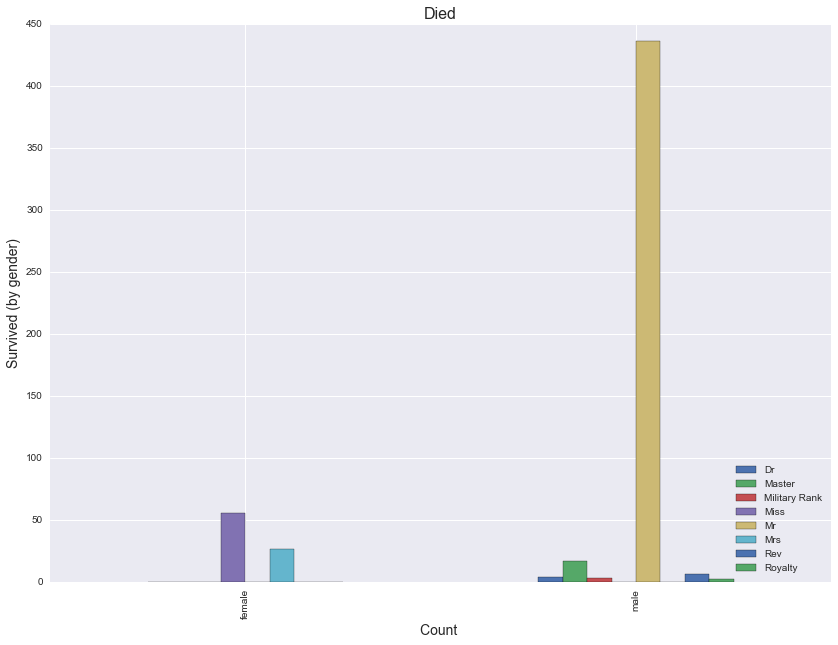

In [219]:
import numpy as np
import matplotlib.pyplot as plt

df_dead = (df['Survived'] == 0)
df_alive = (df['Survived'] == 1)


fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

df[df_dead].groupby(['Sex','Title'])[['Title']].size().unstack().plot(kind="bar", ax=ax)
#df[df_alive].groupby(['Sex','Title'])[['Title']].size().unstack().plot(kind="bar", ax=ax)

plt.xlabel("Count ", fontsize=14)
plt.ylabel("Survived (by gender)", fontsize=14)
plt.title('Died', fontsize=16)
plt.legend(loc='lower right')
#plt.show

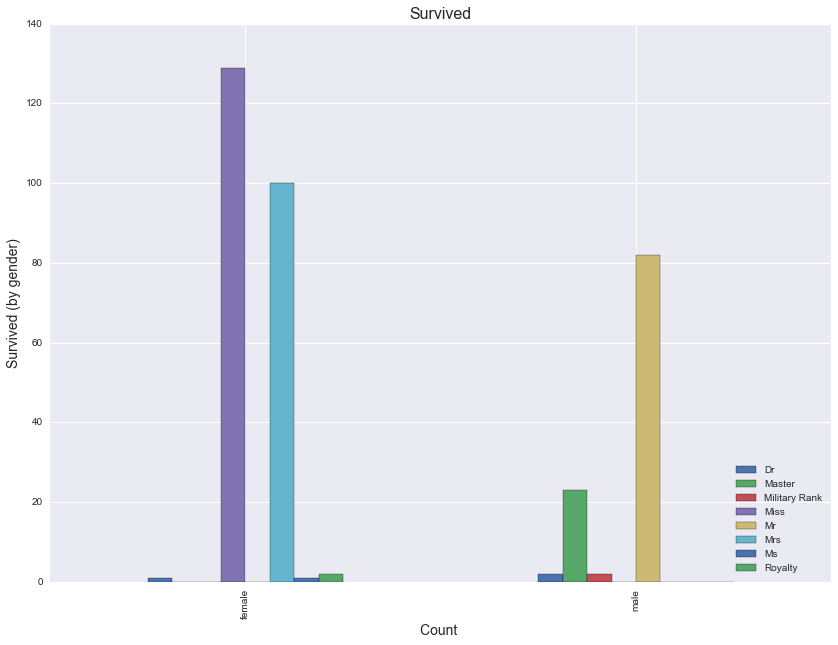

In [220]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

#df[df_dead].groupby(['Sex','Title'])[['Title']].size().unstack().plot(kind="bar", ax=ax)
df[df_alive].groupby(['Sex','Title'])[['Title']].size().unstack().plot(kind="bar", ax=ax)

plt.xlabel("Count ", fontsize=14)
plt.ylabel("Survived (by gender)", fontsize=14)
plt.title('Survived', fontsize=16)
plt.legend(loc='lower right')
#plt.show